In [1]:
import pandas as pd 
import math 
import numpy as np  

In [3]:
p

/usr/local/bin/python3


In [2]:
df=pd.read_csv("/Users/hedlighazwa/Desktop/data-extraction/data_weld/my_report_weld.csv")

In [3]:
df.shape

(15035868, 60)

In [4]:
print(df.columns)


Index(['Visit Starting Date', 'TimeZone', 'Visitor Code', 'NEW/RETURNING',
       'Device Type', 'Operating System', 'Browser', 'Referrer URL',
       'Landing Page URL', 'Country', 'Duration (seconds)',
       'Experiment Q: New Newsletter Stage (one-click subscription) assignation',
       'Goal Engagement (42795)', 'Goal Engagement (42795) Revenue',
       'Goal CG_myPassFinish (MAIN SALES GOAL!) (67011)',
       'Goal CG_myPassFinish (MAIN SALES GOAL!) (67011) Revenue',
       'Goal ErrorTestNotApplied (96144)',
       'Goal ErrorTestNotApplied (96144) Revenue',
       'Goal TEST_APPLIED (119337)', 'Goal TEST_APPLIED (119337) Revenue',
       'Goal CG_WELT_MainCancellationGoal (308643)',
       'Goal CG_WELT_MainCancellationGoal (308643) Revenue',
       'Goal CG_WELT_MainRegistrationGoal (308829)',
       'Goal CG_WELT_MainRegistrationGoal (308829) Revenue',
       'Goal CG_Scroll_To_Newsletter_Stage (316388)',
       'Goal CG_Scroll_To_Newsletter_Stage (316388) Revenue',
       '

In [5]:
df['Experiment Q: New Newsletter Stage (one-click subscription) assignation'].value_counts()

Experiment Q: New Newsletter Stage (one-click subscription) assignation
V1: NEW NEWSLETTER STAGE (970702)    15010085
Control (973514)                        25783
Name: count, dtype: int64

In [6]:
df_bis=df[df['Experiment Q: New Newsletter Stage (one-click subscription) assignation']=='V1: NEW NEWSLETTER STAGE (970702)']

In [7]:
df_bis.shape

(15010085, 60)

In [8]:
df_bis=df[df['Experiment Q: New Newsletter Stage (one-click subscription) assignation']=='Control (973514)']

In [9]:
df_bis.shape

(25783, 60)

IS IT NORMAL TO HAVE columns not binary? 

In [10]:
valeurs_uniques = df['Goal Engagement (42795)'].unique()
valeurs_uniques

array([ 1,  0,  2,  3,  5,  4,  6,  7,  9,  8, 12, 10, 28, 16, 18, 11, 22,
       24, 13, 15, 14, 27, 32, 31, 26, 17, 19, 20, 39, 30, 41, 36, 75, 25,
       34, 21, 23])

In [11]:
df['Goal Engagement (42795)'] =df['Goal Engagement (42795)'].apply(lambda x: 1 if x > 1 else x)




In [12]:
value_counts = df['Goal Engagement (42795)'].value_counts()
value_counts

Goal Engagement (42795)
1    11324350
0     3711518
Name: count, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Country,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration (seconds),15035868.0,6.049558e+02,880.230243,0.0,75.0,252.0,757.0,7200.0
Goal Engagement (42795),15035868.0,7.531557e-01,0.431175,0.0,1.0,1.0,1.0,1.0
Goal Engagement (42795) Revenue,15035868.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
Goal CG_myPassFinish (MAIN SALES GOAL!) (67011),15035868.0,8.246947e-05,0.009262,0.0,0.0,0.0,0.0,2.0
Goal CG_myPassFinish (MAIN SALES GOAL!) (67011) Revenue,15035868.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
Goal ErrorTestNotApplied (96144),15035868.0,5.911930e-02,0.329544,0.0,0.0,0.0,0.0,78.0
Goal ErrorTestNotApplied (96144) Revenue,15035868.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
Goal TEST_APPLIED (119337),15035868.0,6.122277e+00,6.290470,0.0,3.0,4.0,7.0,409.0
Goal TEST_APPLIED (119337) Revenue,15035868.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
df.shape

(15035868, 60)

In [15]:
df_visits = df.groupby('Visitor Code').size().reset_index(name='number_of_visits')


In [16]:
df_visits.head(3)

,Visitor Code,number_of_visits
0,000030cd0b758439,11
1,000062b9a3c5e855,11
2,00007d704f403f80,1


In [17]:
df_visits = df_visits.reset_index(drop=True)


In [18]:

'''goal_columns  = [col for col in df.columns if (col.startswith('Goal') and  not col.endswith(' Revenue'))]

#goal_columns = [col for col in df_filtered .columns if col.startswith('Goal')]
df['goal_product'] = df[goal_columns].prod(axis=1)'''

"goal_columns  = [col for col in df.columns if (col.startswith('Goal') and  not col.endswith(' Revenue'))]\n\n#goal_columns = [col for col in df_filtered .columns if col.startswith('Goal')]\ndf['goal_product'] = df[goal_columns].prod(axis=1)"

In [19]:
df.head(5)

,Visit Starting Date,TimeZone,Visitor Code,NEW/RETURNING,Device Type,Operating System,Browser,Referrer URL,Landing Page URL,Country,...,Goal CG_THORSTEN_JUNGHOLT_SUBSCRIPTION (340721),Goal CG_THORSTEN_JUNGHOLT_SUBSCRIPTION (340721) Revenue,Goal CG_KLAUS_GEIGER_SUBSCRIPTION (340722),Goal CG_KLAUS_GEIGER_SUBSCRIPTION (340722) Revenue,Goal CG_MONEY_MAIL_SUBSCRIPTION (340724),Goal CG_MONEY_MAIL_SUBSCRIPTION (340724) Revenue,Goal CG_CLICK_NEWSLETTER_STAGE (341768),Goal CG_CLICK_NEWSLETTER_STAGE (341768) Revenue,Goal CG_CLICK_NEWSLETTER_OVERVIEW (341783),Goal CG_CLICK_NEWSLETTER_OVERVIEW (341783) Revenue
0,06/14/2024 23:49:41,Europe/Berlin,fsd4w99nc4v0guk3,RETURNING,TABLET,I_OS,SAFARI,https://www.welt.de/,https://www.welt.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
1,06/15/2024 08:02:06,Europe/Berlin,fsd4w99nc4v0guk3,RETURNING,TABLET,I_OS,SAFARI,NaN,https://www.welt.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
2,06/15/2024 09:07:19,Europe/Berlin,fsd4w99nc4v0guk3,RETURNING,TABLET,I_OS,SAFARI,NaN,https://www.welt.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
3,06/15/2024 10:30:08,Europe/Berlin,fsd4w99nc4v0guk3,RETURNING,TABLET,I_OS,SAFARI,NaN,https://www.welt.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
4,06/15/2024 11:46:02,Europe/Berlin,fsd4w99nc4v0guk3,RETURNING,TABLET,I_OS,SAFARI,NaN,https://www.welt.de/,NaN,...,0,0,0,0,0,0,0,0,0,0


In [20]:
goal_columns


NameError: name 'goal_columns' is not defined

<font size="3"> we chose the main goal as a goal 


In [ ]:

df_visits['converted_sessions']=df.groupby('Visitor Code')['Goal Engagement (42795)'].transform('sum')

In [ ]:
df_visits['converted_sessions'].value_counts()


converted_sessions
1      77249
0      74949
2      54424
3      45774
4      43215
       ...  
197       16
194       14
195       14
205       12
188       11
Name: count, Length: 197, dtype: int64

In [ ]:
df_visits.head(10)

,Visitor Code,number_of_visits,converted_sessions
0,000030cd0b758439,11,13
1,000062b9a3c5e855,11,13
2,00007d704f403f80,1,13
3,000152e045f310c2,1,13
4,000159b209cf5080,4,13
5,0001b2f0d40cd6c5,146,13
6,0002a4fbc4d670f5,17,30
7,0002d06c3cab277e,1,30
8,0002d65d49536f4c,3,30
9,0003658d8ed19e2e,9,30


In [ ]:
## Mean and variance estimator calculation 
mu_S=df_visits['converted_sessions'].mean()
mu_N=df_visits['number_of_visits'].mean()
cov_matrix = np.cov(df_visits['converted_sessions'].values,df_visits['number_of_visits'].values)
var_SN= cov_matrix[0, 1] 

#number of visitors 
k=df_visits.shape[0]
print("average converted session is " , np.round(mu_S,5))
print("average number of visit/user  is " , np.round(mu_N ,2))


average converted session is  33.70262
average number of visit/user  is  8.49


In [ ]:
cov_matrix

array([[ 1.03688059e+03, -9.07307662e-01],
       [-9.07307662e-01,  2.80339983e+02]])

Now we caluclate the variance of our estimator based on the Delta Method
$$
\bar{X} = \frac{\sum_{i,j} X_{ij}}{\sum_i N_i} = \frac{\sum_i S_i / k}{\sum_i N_i / k} = \bar{S}
$$




$$
\text{Var}\left( \frac{\bar{S}}{\bar{N}} \right) \approx \frac{1}{k \mu_N^2} \left( \sigma_S^2 - 2 \frac{\mu_S}{\mu_N} \sigma_{SN} + \frac{\mu_S^2}{\mu_N^2} \sigma_N^2 \right)
$$



In [ ]:

w=mu_S/mu_N
var_X=1/(k*mu_N**2)*(cov_matrix[0,0]-2*w*var_SN+w**2*cov_matrix[1,1])

In [ ]:
var_X

0.0001281270734021774

In [ ]:
test=df[df['Experiment BILD: Browser Extension Home EURO24 V2 assignation']=='V1: Der geniale Trick (988277)']

<Axes: >

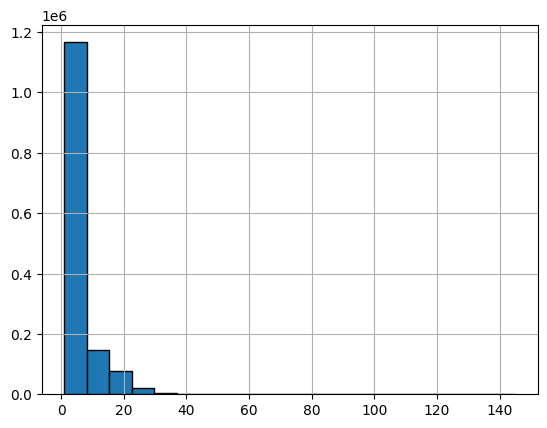

In [ ]:
import matplotlib.pyplot as plt
df_visits['number_of_visits'].hist(bins=20, edgecolor='black')
